# Task 1 - User Overview analysis 


## Task 1.1

In the below code section we initiallize our **panda** and read the **source file** to be interperated.We will also choose a random sample of **`5%`** from the given data source as our test data points.

In [548]:
import os
import pandas as pd
path='C:/Users/chuna/Downloads/challenge/Week2_challenge_data_source.xlsx'
isFile = os.path.isfile(path) 
print(isFile)                           
tf = pd.read_excel(path)
df = tf.sample(frac =.1)



True


In this part of the code we will make the random samplees drawn from the file (aboyt 9000 rows) formatted in way that enables analysis.This includes 
* Combining related data like addind Upload and Download for each Application
* Cleaning data of outliers as done  by the function **clean()**(also removing `NaN` values)
* Collecting the cleaned data into  a Dataframe(I have named **regression** because it will be fitting later).

In [553]:
import warnings
warnings.filterwarnings('ignore')
regre=df[['Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
         'Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)',
          'Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)']]

regre['Social']=regre['Social Media DL (Bytes)'] + regre['Social Media UL (Bytes)']
regre['Google']=regre['Google DL (Bytes)'] + regre['Google UL (Bytes)']
regre['Email']=regre['Email DL (Bytes)'] + regre['Email UL (Bytes)']
regre['Youtube']=regre['Youtube DL (Bytes)'] + regre['Youtube UL (Bytes)']
regre['Netflix']=regre['Netflix DL (Bytes)'] + regre['Netflix UL (Bytes)']
regre['Gaming']=regre['Gaming DL (Bytes)'] + regre['Gaming UL (Bytes)']
regre['Other']=regre['Other DL (Bytes)'] + regre['Other UL (Bytes)']
regre['Total']=regre['Total UL (Bytes)'] + regre['Total DL (Bytes)']

def clean(x1):
    
    x1 = x1[x1.between(x1.quantile(.15), x1.quantile(.75))] 
    x1.fillna(x1.mean())
    
    y1=pd.DataFrame(x1)
    y1.reset_index(drop=True, inplace=True)

    return y1



social=clean(regre['Social'])
Google=clean(regre['Google'])
Email=clean(regre['Email'])
Youtube=clean(regre['Youtube'])
Netflix=clean(regre['Netflix'])
Gaming=clean(regre['Gaming'])
Other=clean(regre['Other'])
Total=clean(regre['Total'])




regression =pd.concat([social,Google,Youtube,Netflix,Gaming,Other,Total],axis=1)

regression

,Social,Google,Youtube,Netflix,Gaming,Other,Total
0,1224761.0,10259159.0,26172811.0,24246665.0,609741280.0,242266042.0,682550995.0
1,885983.0,9961430.0,27175363.0,16326722.0,314023501.0,401744004.0,363492324.0
2,2206105.0,9049439.0,14113387.0,29117703.0,451704753.0,201223094.0,505106373.0
3,1546444.0,4625037.0,22128728.0,19566488.0,545174355.0,230046711.0,610010644.0
4,2470442.0,9656498.0,24428061.0,25843015.0,445401898.0,218720231.0,515161688.0
...,...,...,...,...,...,...,...
8995,668412.0,10539914.0,20020095.0,22674791.0,289398658.0,385632114.0,505878626.0
8996,1578559.0,9463420.0,21794516.0,29143906.0,147634833.0,365233261.0,359388316.0
8997,1343118.0,3972006.0,25274145.0,20055665.0,465313631.0,439058645.0,208438885.0
8998,570850.0,10361918.0,25919285.0,19908909.0,139076374.0,178557189.0,517203228.0


Here we are going to group the original dataframe by user and find the following:
* Count tthe number of xDR **sessions**.
* Find the total **Upload and Download** volume.
* The **total data volume** due to Applications . 

In [541]:
gk = df.groupby('MSISDN/Number').agg(Total_xDR=('Dur. (ms)', 'sum'), 
 number_of_xDR_sessions=('Bearer Id', 'count'),Total_DL=('Total DL (Bytes)', 'sum'),Total_UL=('Total UL (Bytes)', 'sum')) 
gk['total_data_volume_(in Bytes)'] = gk['Total_DL'] + gk['Total_UL']  # assigned to a column#####################################################
task_1_1=gk
task_1_1



,Total_xDR,number_of_xDR_sessions,Total_DL,Total_UL,total_data_volume_(in Bytes)
MSISDN/Number,,,,,
3.360101e+10,49878.0,1,401993172.0,20327526.0,422320698.0
3.360104e+10,98337.0,1,435614519.0,25271829.0,460886348.0
3.360105e+10,69366.0,1,202497724.0,56028469.0,258526193.0
3.360106e+10,179891.0,1,194878424.0,37178643.0,232057067.0
3.360107e+10,63397.0,1,637989641.0,26715591.0,664705232.0
...,...,...,...,...,...
3.378980e+10,449225.0,1,487494104.0,28041324.0,515535428.0
3.378984e+10,227852.0,1,264232718.0,23394981.0,287627699.0
3.378988e+10,47989.0,1,554982183.0,55589284.0,610571467.0


## Task 1.2

This is where we will do simple **`Non-Graphical Univariate Analysis`** where we figure out which Handset is used widly and
also which **`Handset Manufacturer`** is best chosen by users.the top 5 handsets per **`Handset Manufacturer`** is also captured.

In [544]:
handsets=df['Handset Type']
handsets=handsets[handsets!='undefined']


handsets.value_counts().nlargest(10)


handsetmanufacturer=df['Handset Manufacturer']
handsetmanufacturer=handsetmanufacturer[handsetmanufacturer!='undefined']
hmvc=handsetmanufacturer.value_counts().nlargest(10)
hmvc

           

Apple                                   5950
Samsung                                 4033
Huawei                                  3465
Sony Mobile Communications Ab             97
Wiko Global Sasu                          73
Xiaomi Communications Co Ltd              45
Oneplus Technology (Shenzhen) Co Ltd      37
Htc                                       31
Asustek                                   27
Lenovo                                    26
Name: Handset Manufacturer, dtype: int64

In [554]:
handsets.value_counts().nlargest(10)

Huawei B528S-23A                1948
Apple iPhone 6S (A1688)          977
Apple iPhone 6 (A1586)           892
Apple iPhone 7 (A1778)           617
Apple iPhone Se (A1723)          503
Apple iPhone 8 (A1905)           461
Apple iPhone Xr (A2105)          456
Apple iPhone X (A1901)           422
Samsung Galaxy S8 (Sm-G950F)     422
Samsung Galaxy A5 Sm-A520F       387
Name: Handset Type, dtype: int64

In [555]:
gkk = df.groupby(['Handset Manufacturer'])
##.agg(Total_xDR=('Handset Type', 'count'))
gkk.get_group('Apple')['Handset Type'].value_counts().nlargest(5) 

Apple iPhone 6S (A1688)    1007
Apple iPhone 6 (A1586)      899
Apple iPhone 7 (A1778)      616
Apple iPhone Se (A1723)     542
Apple iPhone 8 (A1905)      502
Name: Handset Type, dtype: int64

In [556]:
gkk.get_group('Samsung')['Handset Type'].value_counts().nlargest(5)

Samsung Galaxy S8 (Sm-G950F)    461
Samsung Galaxy A5 Sm-A520F      385
Samsung Galaxy J5 (Sm-J530)     379
Samsung Galaxy J3 (Sm-J330)     354
Samsung Galaxy S7 (Sm-G930X)    297
Name: Handset Type, dtype: int64

**`Graphical Univariate Analysis`** for the duration of a single session can be shown by plotting the data on **distplot()**.Rough estimation of the mean can be done from the figure.The data has been cleaned prior to drwaing.

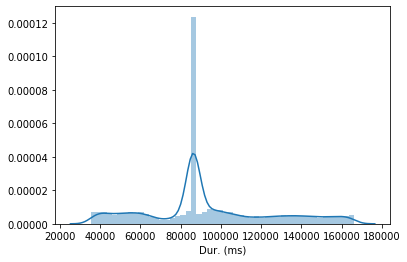

In [561]:
duration=df['Dur. (ms)']

x= duration

x = x[x.between(x.quantile(.15), x.quantile(.85))] 



g= sns.distplot(x)




**Bivariate Analysis** The relationship between each application & the total DL+UL data can be visualized here.

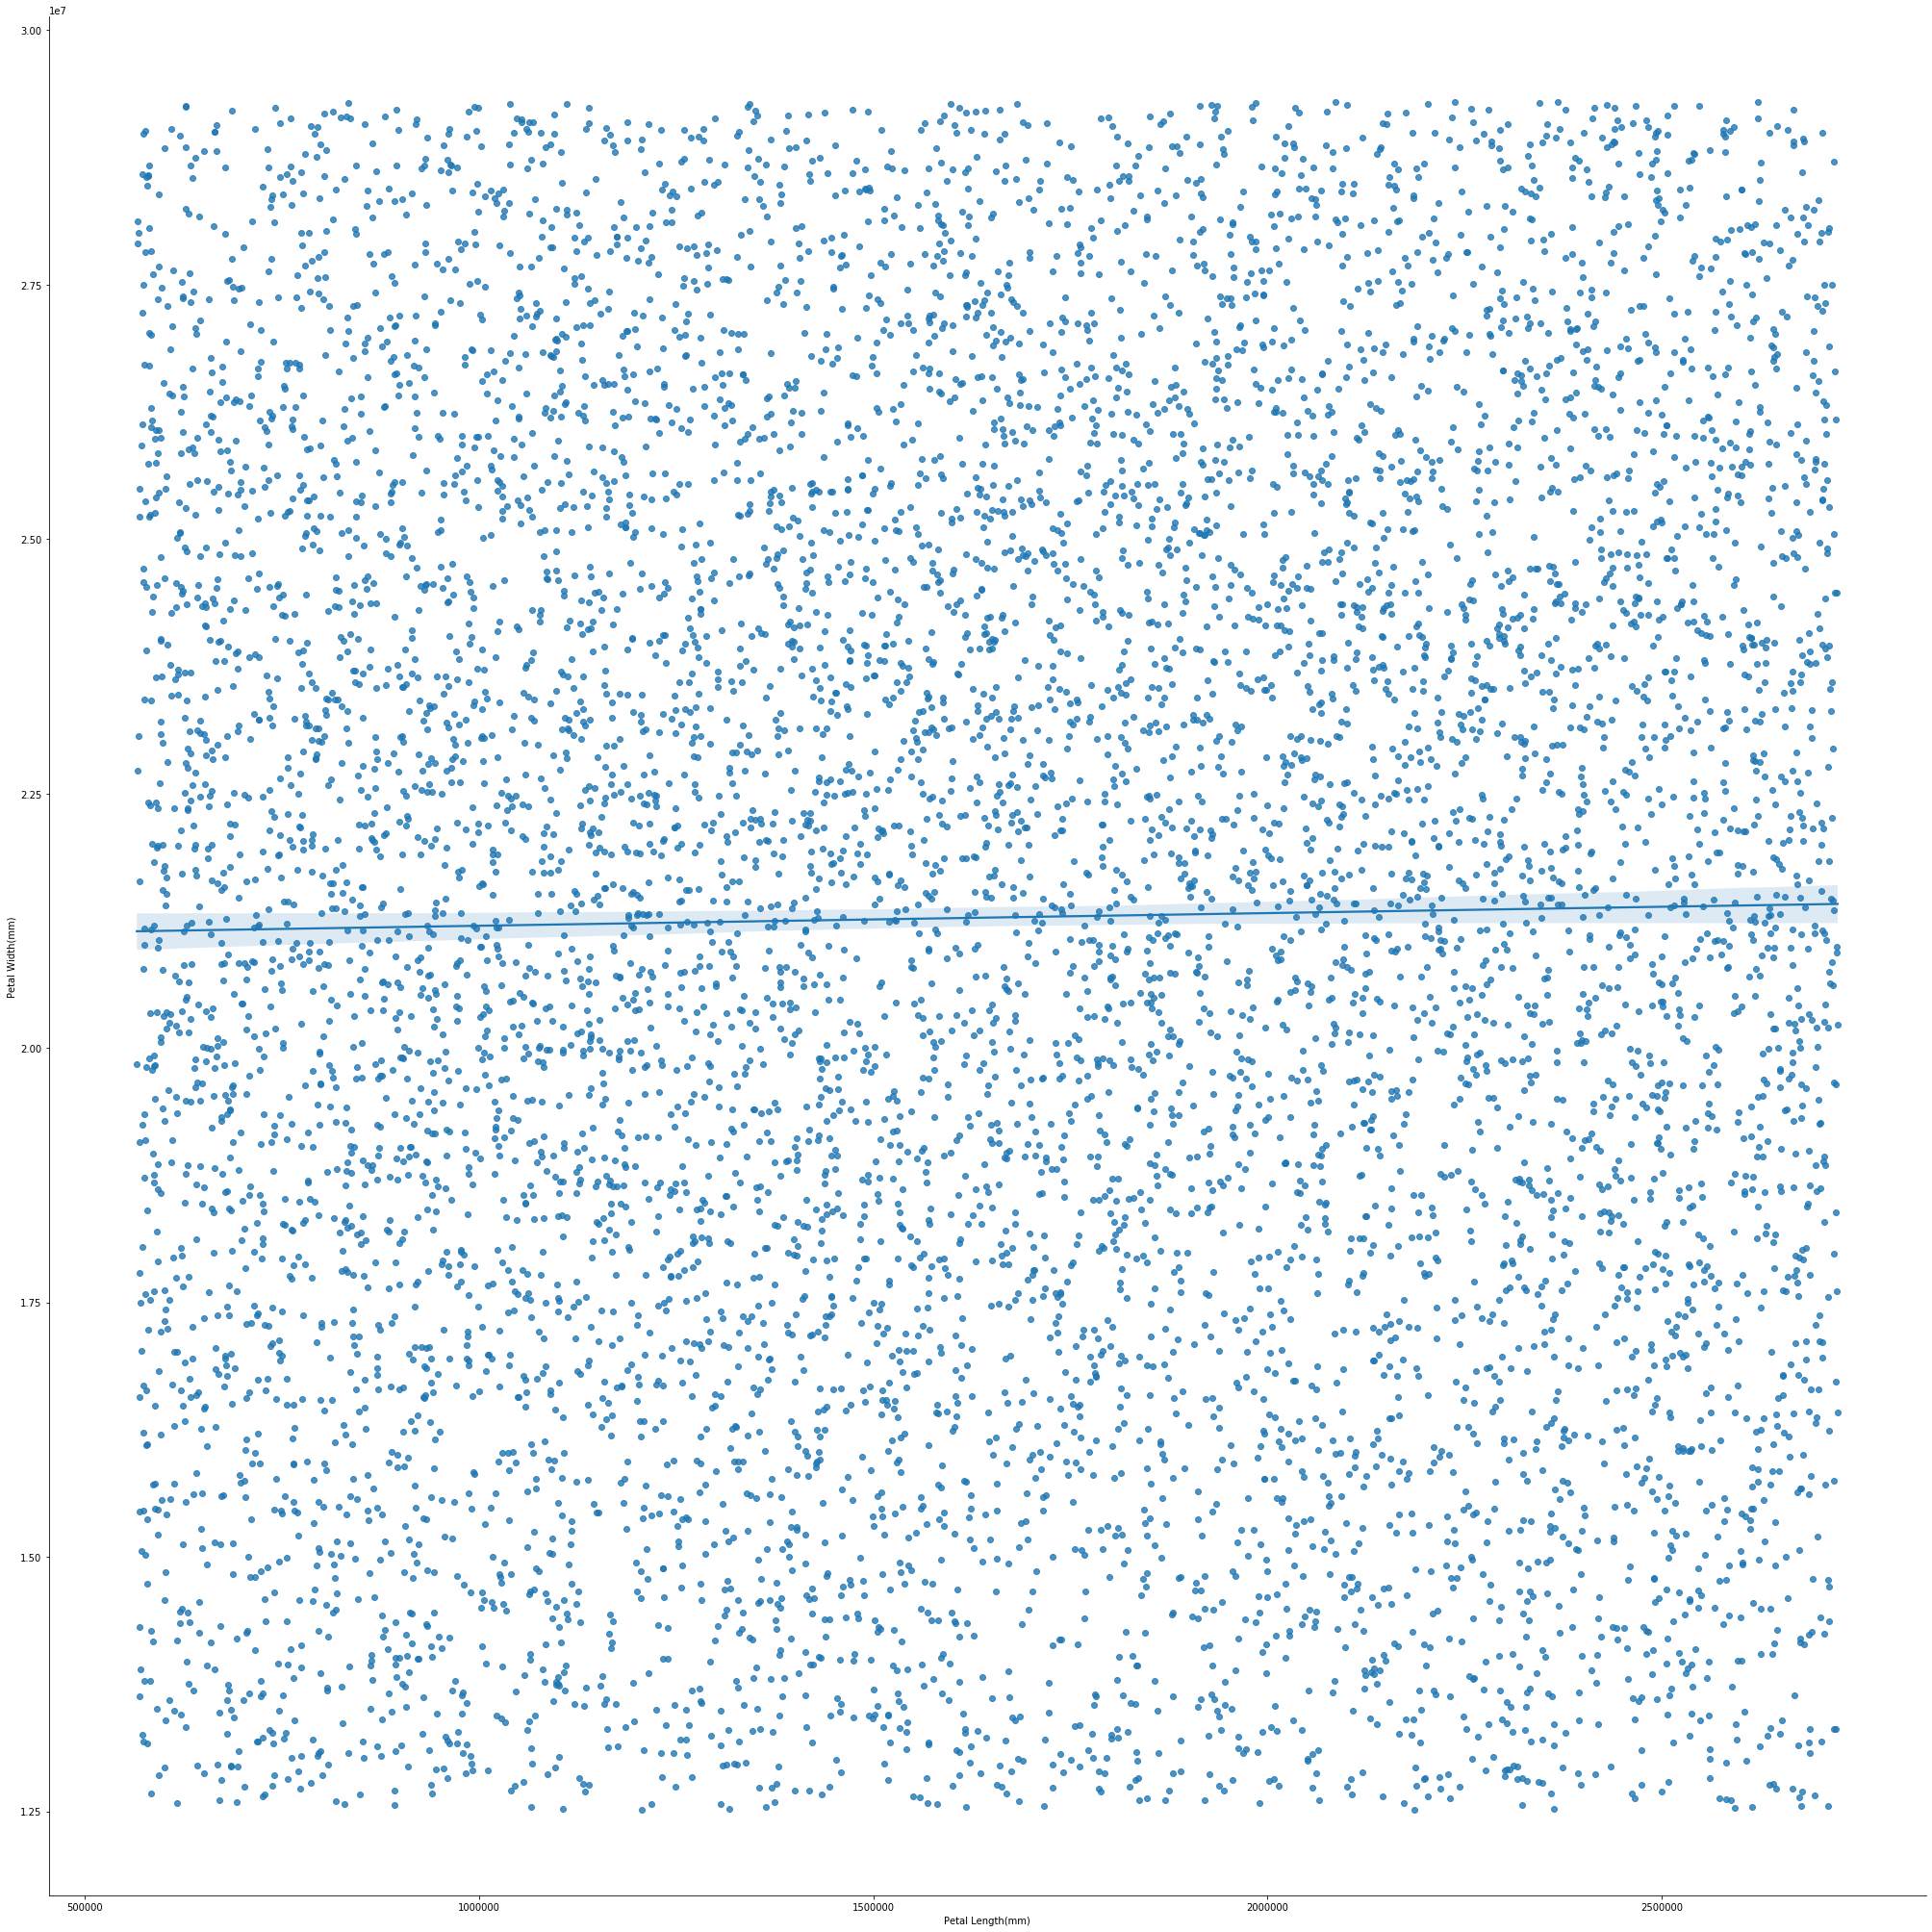

In [564]:
g = sns.lmplot(x='Social', y='Youtube',height=28, order=1, data=regression)
g.set_axis_labels("Petal Length(mm)", "Petal Width(mm)" )

The **top five decile classes** can be observed here.Duplicates have been droped to enable computation.After grouping by their decile clases there total xDR is suumed.

In [575]:
task_1_1

task_1_1['Decile_rank'] = pd.qcut(task_1_1['Total_xDR'], 10, duplicates='drop' , labels = False)


task_1_2 = task_1_1.groupby('Decile_rank').agg(Total_xDR=('total_data_volume_(in Bytes)', 'sum'))
task_1_2.head()

,Total_xDR
Decile_rank,
0,7.146076e+11
1,7.182370e+11
2,7.210483e+11
3,1.387031e+12
4,2.732551e+11


**Correlation Analysis** for the cleaned data points is computed here.Also it is shown that some variables are more related than other.

           Social    Google   Youtube   Netflix    Gaming     Other
Social   1.000000 -0.004184  0.016967 -0.012716 -0.004808 -0.006463
Google  -0.004184  1.000000  0.001706 -0.025602 -0.007730 -0.005763
Youtube  0.016967  0.001706  1.000000  0.001612 -0.004037 -0.007502
Netflix -0.012716 -0.025602  0.001612  1.000000 -0.020913  0.002752
Gaming  -0.004808 -0.007730 -0.004037 -0.020913  1.000000  0.000208
Other   -0.006463 -0.005763 -0.007502  0.002752  0.000208  1.000000


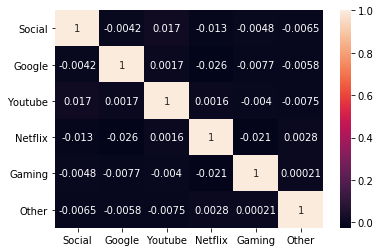

In [572]:
del regression['Total']
corrMatrix = regression.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)
plt.show()


